In [5]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [6]:
def oracle(numbers, goal, wires, aux_wires):
    """Oracle to mark states where the sum of the selected numbers is equal to the goal."""
    
    def add_k_fourier(k, wires):
        for j in range(len(wires)):
            qml.RZ(k * np.pi / (2**j), wires=wires[j])
    
    def compute_sum_in_fourier_basis():
        qml.QFT(wires=aux_wires)
        for idx, wire in enumerate(wires):
            qml.ctrl(add_k_fourier, control=wire)(numbers[idx], wires=aux_wires)
        qml.adjoint(qml.QFT)(wires=aux_wires)
        
    compute_sum_in_fourier_basis()
    qml.FlipSign(goal, aux_wires)
    qml.adjoint(compute_sum_in_fourier_basis)()

def grover_circuit(numbers, goal):
    num_wires = len(numbers)
    aux_wires = [num_wires + i for i in range(num_wires)]
    dev = qml.device("default.qubit", wires=num_wires + num_wires)
    
    @qml.qnode(dev)
    def circuit():
        # Step 1: Apply Hadamard gates to all variable wires
        for wire in range(num_wires):
            qml.Hadamard(wires=wire)
        
        for _ in range(3):
            # Step 2: Apply the oracle
            oracle(numbers, goal, range(num_wires), aux_wires)
            
            # Step 3: Apply Grover's diffusion operator
            qml.GroverOperator(wires=range(num_wires))
        
        return qml.probs(wires=range(num_wires))
    
    return circuit()


<BarContainer object of 64 artists>

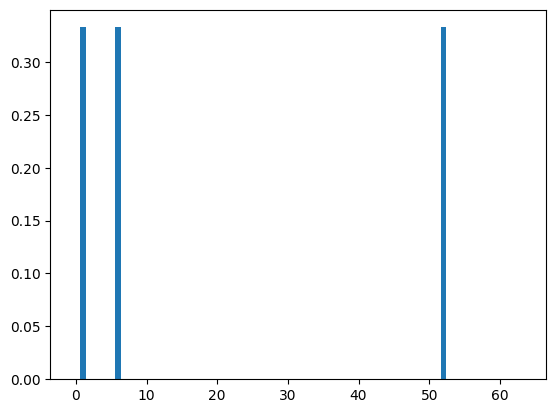

In [7]:
numbers = [4, 8, 6, 3, 12, 15]
numbers = [4, 8, 6, 3, 12, 15]
goal = 18
goal = 15
result = grover_circuit(numbers, goal)

plt.bar( range(len(result)),  result)

In [8]:
## now get only one shot, 
#   shots=1 
#   method to return sample

def grover_circuit(numbers, goal):
    num_wires = len(numbers)
    aux_wires = [num_wires + i for i in range(num_wires)]
    dev = qml.device("default.qubit", wires=num_wires + num_wires, shots=1)
    
    @qml.qnode(dev)
    def circuit():
        # Step 1: Apply Hadamard gates to all variable wires
        for wire in range(num_wires):
            qml.Hadamard(wires=wire)
        
        for _ in range(1):
            # Step 2: Apply the oracle
            oracle(numbers, goal, range(num_wires), aux_wires)
            
            # Step 3: Apply Grover's diffusion operator
            qml.GroverOperator(wires=range(num_wires))
        
        return qml.sample(wires=range(num_wires))
    
    return circuit()


In [9]:
result = grover_circuit(numbers, goal)

In [10]:
np.array(numbers)[result == 1].numpy()

array([8])

([<matplotlib.axis.XTick at 0x766236e04740>,
 [Text(0, 0, '4'),
  Text(1, 0, '8'),
  Text(2, 0, '6'),
  Text(3, 0, '3'),
  Text(4, 0, '12'),
  Text(5, 0, '15')])

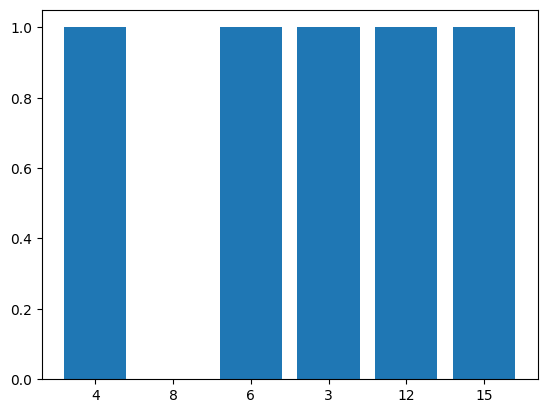

In [11]:
result = grover_circuit(numbers, goal)
plt.bar( range(len(result)),  result)
plt.xticks(range(len(result)), numbers)